In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
from scipy.io import wavfile
from scipy.signal import correlate
import numpy as np

clip = wavfile.read('/content/gdrive/MyDrive/Cornell-Tech-Github/Digital-Signal-Processing/clip.wav')
corc = wavfile.read('/content/gdrive/MyDrive/Cornell-Tech-Github/Digital-Signal-Processing/Corcovado.wav')
clip_freq = clip[0]
corc_freq = corc[0]
clip = clip[1].astype(float)[:,0]
corc = corc[1].astype(float)[:,0]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: WavFileWarning: Chunk (non-data) not understood, skipping it.
  """


Location in the song (seconds): 161.68063492063493


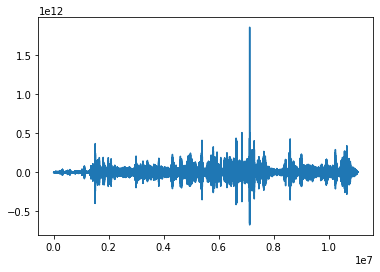

In [ ]:
from matplotlib import pyplot as plt

cor = correlate(corc, clip, mode='valid', method='fft')
plt.plot(cor)
print("Location in the song (seconds): " + str(cor.argmax() / corc_freq))

FIR: -0.5, 0.5, 0
stable: -1, 1, -0.5, 0.5, 0
causal: all


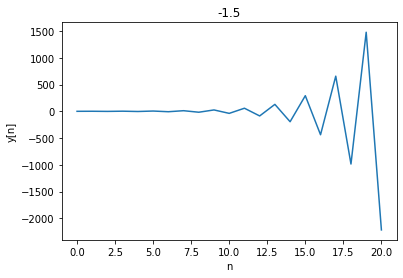

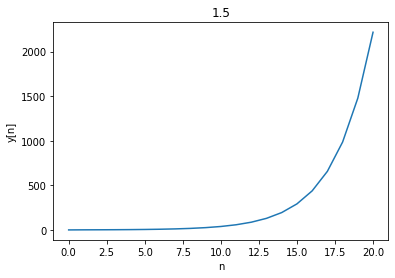

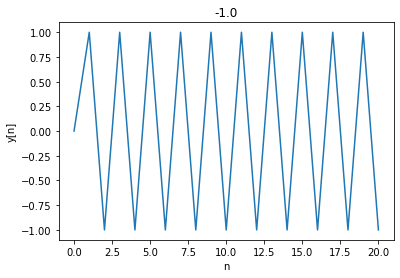

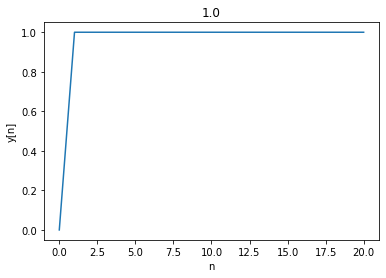

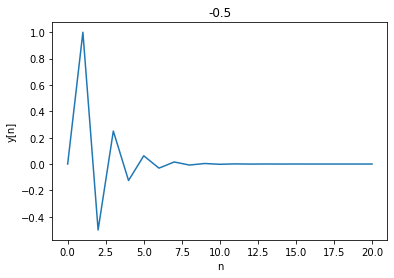

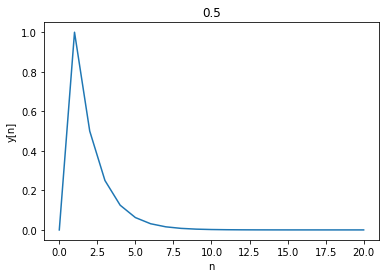

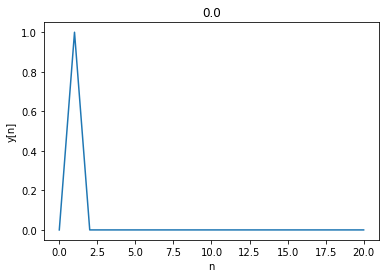

In [ ]:
#2
import matplotlib.pyplot as plt
def compute(alpha):
  x = [1] + [0] * 19
  y = [0] + [0] * 20
  for n in range(1, 21):
    y[n] = alpha * y[n - 1] + x[n - 1]
  return y

alphas = [-1.5, 1.5, -1.0, 1.0, -0.5, 0.5, 0.0]
for a in alphas:
  output = compute(a)
  plt.figure()
  plt.title(str(a))
  plt.xlabel('n')
  plt.ylabel('y[n]')
  plt.plot(output)

print("FIR: -0.5, 0.5, 0")
print("stable: -1, 1, -0.5, 0.5, 0")
print("causal: all")

[ 1.53210777e-14+1.69945017e-14j -3.24238072e-06-1.03207842e-03j
 -1.29693802e-05-2.06411379e-03j ... -1.29693802e-05+2.06411379e-03j
 -3.24238071e-06+1.03207842e-03j  1.53210777e-14-1.69945017e-14j]


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


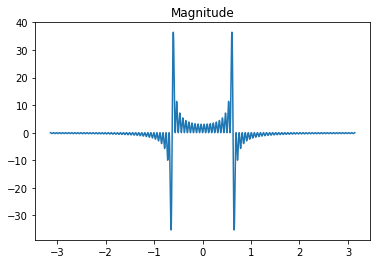

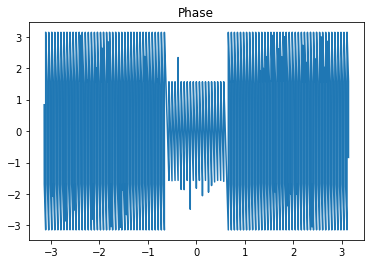

In [ ]:
#3
def dtft(input1, input2):
  omega = np.linspace(-np.pi, np.pi, 100001).reshape(-1, 1)
  input1 = input1.reshape(1, -1)
  input2 = input2.reshape(-1, 1)
  X = np.exp(-1j * omega * input1)
  X = np.dot(X, input2)
  X = np.sum(X, axis=1)
  plt.figure()
  plt.title('Magnitude')
  plt.plot(omega, X)
  plt.figure()
  plt.title('Phase')
  plt.plot(omega, np.angle(X))

def setup(length, phase, freq):
  input = np.sin(np.pi * 2 * freq * np.linspace(0, length, length) + phase)
  dtft(np.linspace(0, length, length), input)

setup(100, 0, 0.1)

[ 2.17603713e-14+1.05614818e-14j -1.57964936e-06-5.02816363e-04j
 -6.31852864e-06-1.00561184e-03j ... -6.31852867e-06+1.00561184e-03j
 -1.57964938e-06+5.02816363e-04j  2.17603713e-14-1.05614818e-14j]


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


[-0.95892427+4.98212582e-15j -0.95896858+2.71993406e-03j
 -0.95899559+5.44009216e-03j ... -0.95899559-5.44009216e-03j
 -0.95896858-2.71993406e-03j -0.95892427-4.98212582e-15j]


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


[ 5.34683409e-13+9.93427227e-14j -3.20921303e-04-1.02118815e-02j
 -1.28241855e-03-2.03834592e-02j ... -1.28241855e-03+2.03834592e-02j
 -3.20921305e-04+1.02118815e-02j  5.34683409e-13-9.93427227e-14j]


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


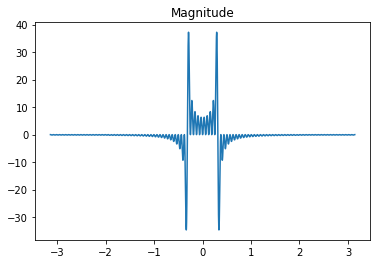

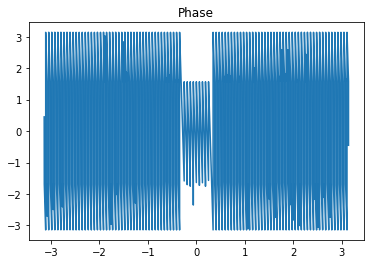

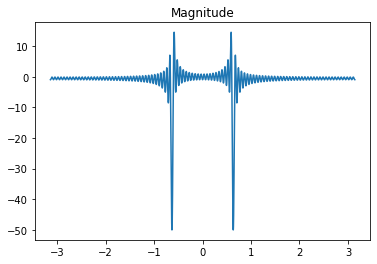

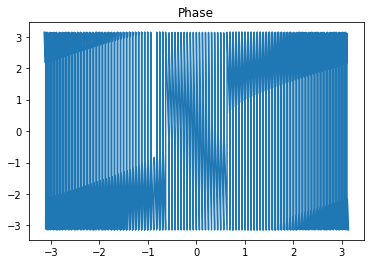

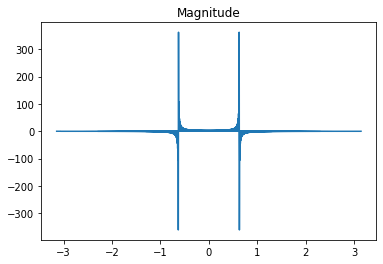

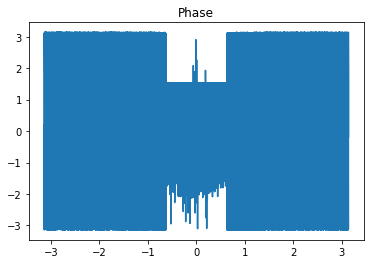

In [ ]:
setup(100, 0, 0.05)
setup(100, 5, 0.1)
setup(1000, 0, 0.1)